# import any potentially needed libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn import svm

# import our dataset

In [38]:
dataset = pd.read_csv(r"C:\Users\Shehab\Desktop\data.csv")

# DECISION TREE WILL BE IMPLEMENTED FIRSTLY
# the target (dependant) variable will be the 'result' column

In [39]:
target = dataset.result

# all other variables (all other columns) will be the independant variables

In [40]:
attributes = list(zip(dataset.location,
                     dataset.country,
                     dataset.gender,
                     dataset.age,
                     dataset.vis_wuhan,
                     dataset.from_wuhan,
                     dataset.symptom1,
                     dataset.symptom2,
                     dataset.symptom3,
                     dataset.symptom4,
                     dataset.symptom5,
                     dataset.symptom6,
                     dataset.diff_sym_hos))

# now we will split the dataset into training, validation and testing

In [5]:
target_train, target_test = train_test_split(target, test_size = 0.15, train_size = 0.85, random_state = 42, shuffle = True, stratify = None)
attributes_train, attributes_test = train_test_split(attributes, test_size = 0.15, train_size = 0.85, random_state = 42, shuffle = True, stratify = None)

# now the data is split into training(85%) and testing(15%) only

# lets now split the training part into a smaller training part plus the validation part

In [6]:
target_train, target_validate = train_test_split(target_train, test_size = 0.17645, random_state = 42, shuffle = True, stratify = None)
attributes_train, attributes_validate = train_test_split(attributes_train, test_size = 0.17645, random_state = 42, shuffle = True, stratify = None)

# now both training sets are 70%, both validations are 15% and both tests are 15%

In [7]:
# now what are the hyperparameters we are going to work on in the Decision Tree ?
# we are going to try out different max depths (from 4 up until 20) and different criterions (gini & entropy)

In [8]:
max_depth_values = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [9]:
error = []
for i in range(17):
    classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = max_depth_values[i])
    classifier.fit(attributes_train, target_train)
    target_pred = classifier.predict(attributes_validate)
    error.append(np.mean(target_pred != target_validate))

Text(0, 0.5, 'Mean Error')

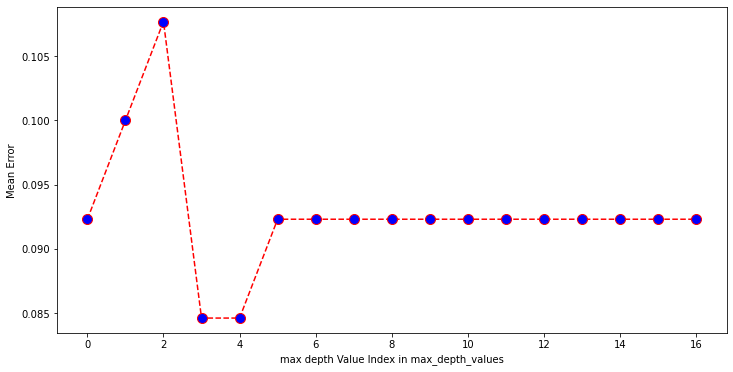

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(range(17), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.xlabel('max depth Value Index in max_depth_values')
plt.ylabel('Mean Error')

In [11]:
# so, from the above graph, the best max_depth when working with Gini is the value at index 3 in the array, which is depth 7

In [12]:
# now lets try the same idea but with the criterion "entropy"

In [13]:
error = []
for i in range(17):
    classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = max_depth_values[i])
    classifier.fit(attributes_train, target_train)
    target_pred = classifier.predict(attributes_validate)
    error.append(np.mean(target_pred != target_validate))

Text(0, 0.5, 'Mean Error')

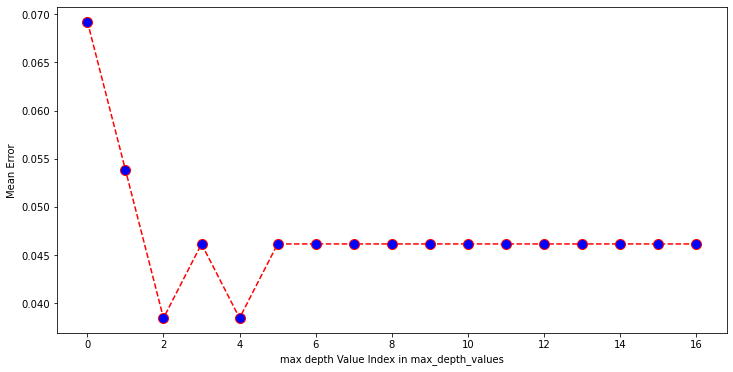

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(17), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.xlabel('max depth Value Index in max_depth_values')
plt.ylabel('Mean Error')

In [15]:
# as we can see from the above graph
# the max_depth at index 2, resulted in 4% error only, which is depth 6
# the lowest error here is 4%, in gini the lowest error was 8.5%
# so we will work on depth 6 and with entropy not gini.

# notice that from the value at index 5 until the last value, the model is overfitting

In [16]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 6)
classifier.fit(attributes_train, target_train)
target_pred = classifier.predict(attributes_test)

In [17]:
accuracy = accuracy_score(target_test,target_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9538461538461539


In [18]:
print('Precision: %.3f' % precision_score(target_test, target_pred))

Precision: 0.857


In [19]:
print('Recall: %.3f' % recall_score(target_test, target_pred))

Recall: 0.750


In [20]:
print('F1 Score: %.3f' % f1_score(target_test, target_pred))

F1 Score: 0.800


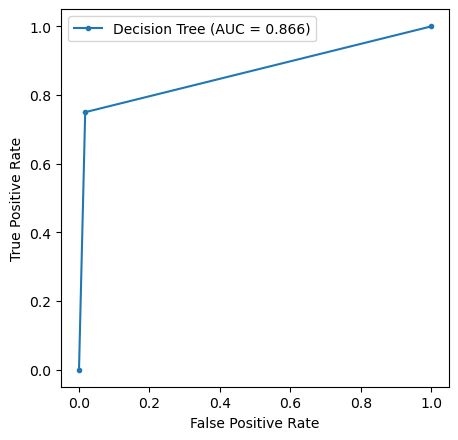

In [21]:
fpr, tpr, threshold = roc_curve(target_test, target_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='Decision Tree (AUC = %0.3f)' % auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

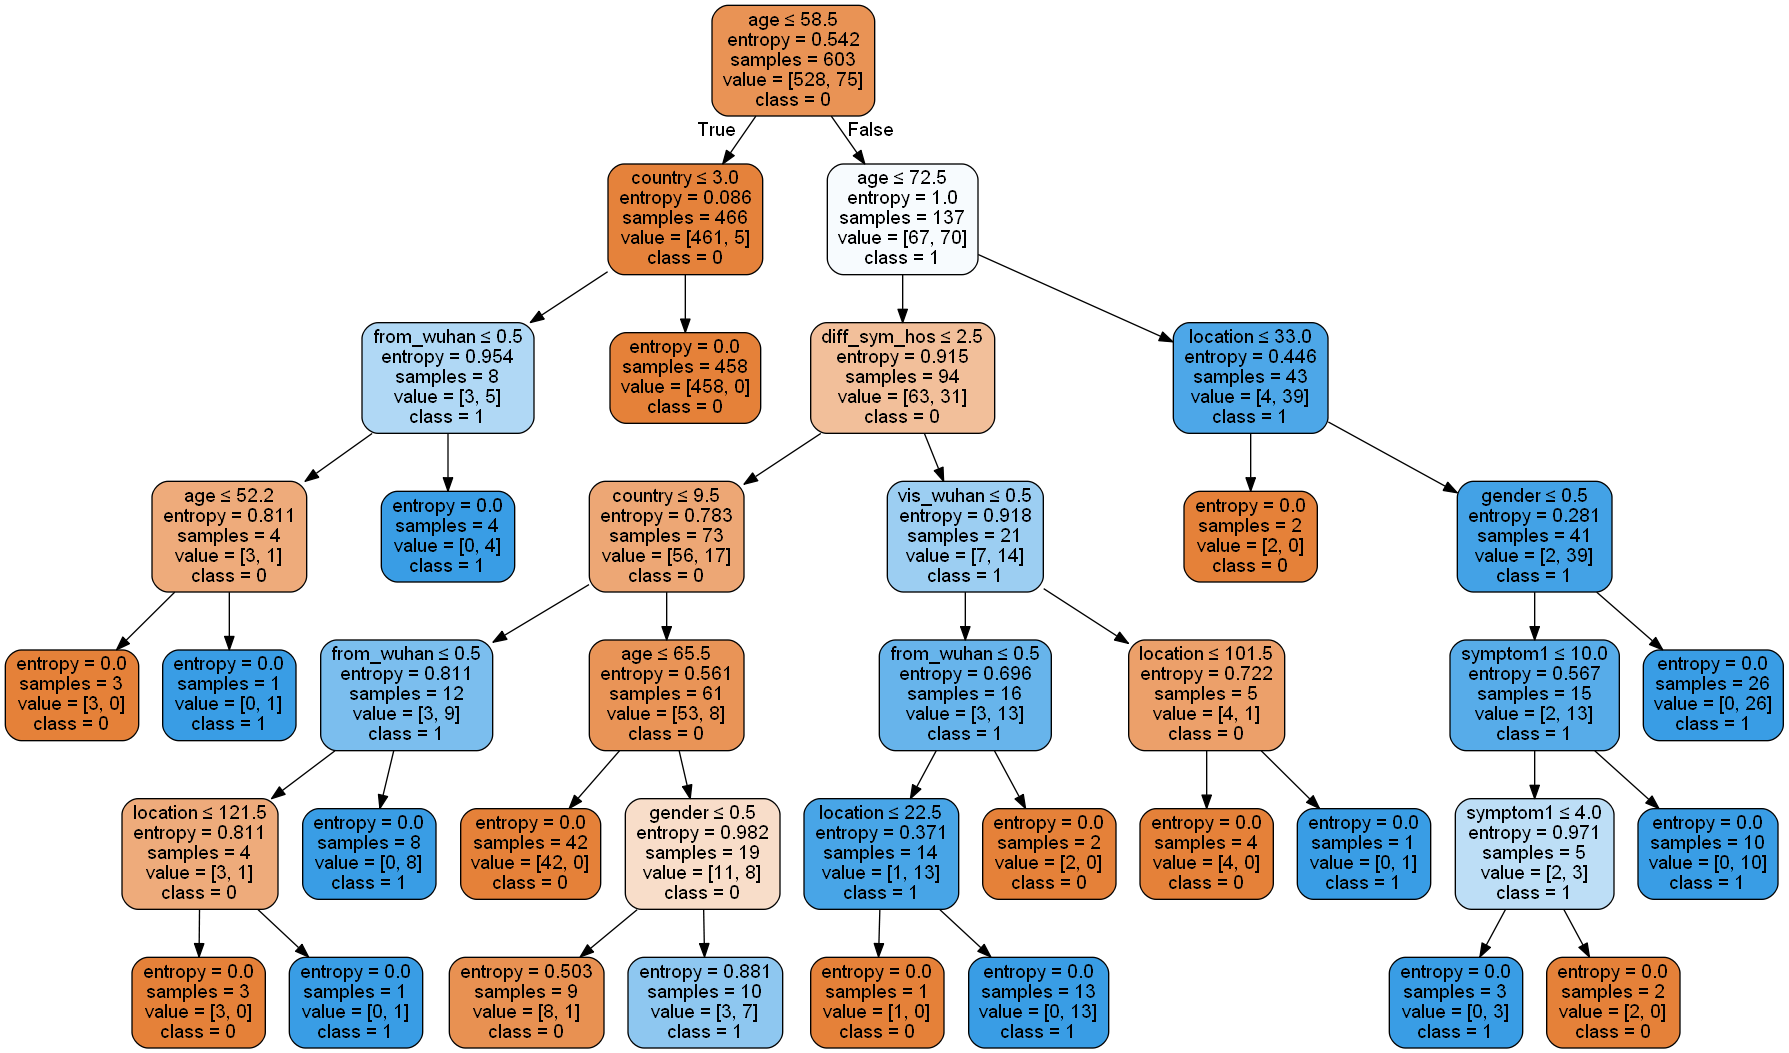

In [22]:
dot_data = StringIO()
feature_cols = ["location", "country", "gender", "age", "vis_wuhan", "from_wuhan", "symptom1", "symptom2", "symptom3", "symptom4", "symptom5", "symptom6", "diff_sym_hos"]
export_graphviz(classifier, out_file = dot_data, rounded = True, filled = True, special_characters = True, feature_names = feature_cols, class_names = ["0", "1"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Corona.png")
Image(graph.create_png())

# NOW WE WILL IMPLEMENT THE SVM 

In [41]:
target_train, target_test = train_test_split(target, test_size = 0.15, train_size = 0.85, random_state = 42, shuffle = True, stratify = None)
attributes_train, attributes_test = train_test_split(attributes, test_size = 0.15, train_size = 0.85, random_state = 42, shuffle = True, stratify = None)

In [42]:
target_train, target_validate = train_test_split(target_train, test_size = 0.17645, random_state = 42, shuffle = True, stratify = None)
attributes_train, attributes_validate = train_test_split(attributes_train, test_size = 0.17645, random_state = 42, shuffle = True, stratify = None)

In [43]:
scaler = StandardScaler()
scaler.fit(attributes_train)
attributes_train = scaler.transform(attributes_train)
attributes_validate = scaler.transform(attributes_validate)
attributes_test = scaler.transform(attributes_test)

In [44]:
# now which hyperparameter are we going to focus on tuning ?
# the kernel, the kernel function is to transform the dataset input data into the required form
# it can take many values such as; linear, poly, rbf or sigmoid

In [45]:
kernel_values = ["linear", "poly", "rbf", "sigmoid"]

In [46]:
error = []
for i in range(4):
    svmClassifier = svm.SVC(random_state = 5, kernel = kernel_values[i])
    svmClassifier.fit(attributes_train, target_train)
    target_pred = svmClassifier.predict(attributes_validate)
    error.append(np.mean(target_pred != target_validate))

Text(0, 0.5, 'Mean Error')

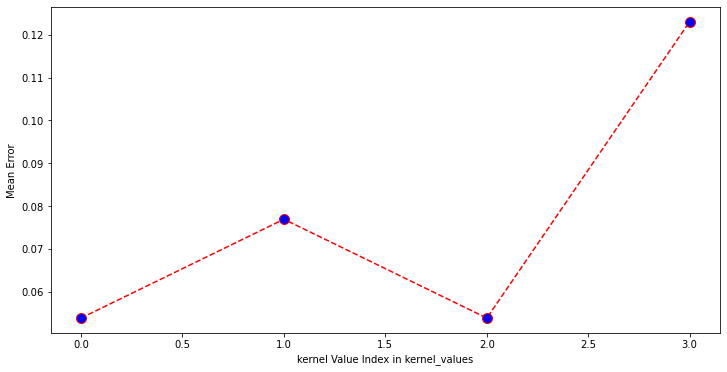

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(range(4), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.xlabel('kernel Value Index in kernel_values')
plt.ylabel('Mean Error')

In [48]:
# so from the graph, the best kernel to use is either the linear or the rbf

In [49]:
svmClassifier = svm.SVC(kernel = 'linear')
svmClassifier.fit(attributes_train, target_train)
target_pred = svmClassifier.predict(attributes_test)

In [50]:
accuracy = accuracy_score(target_test,target_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9615384615384616


In [51]:
print('Precision: %.3f' % precision_score(target_test, target_pred))

Precision: 1.000


In [52]:
print('Recall: %.3f' % recall_score(target_test, target_pred))

Recall: 0.688


In [53]:
print('F1 Score: %.3f' % f1_score(target_test, target_pred))

F1 Score: 0.815


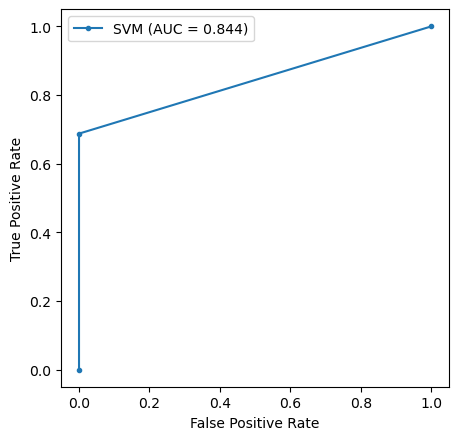

In [54]:
fpr, tpr, threshold = roc_curve(target_test, target_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='SVM (AUC = %0.3f)' % auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()